# 단순 선형 회귀 (학습 성능 개선)
- 텐서플로우의 학습성능을 개선하기 위해 아래의 기능을 사용할 수 있음
1. `데이터 표준화`: 학습률 향상에 도움을 줌
2. `콜백 함수`: 모델의 학습 방향, 저장 시점, 학습 정지 시점 등에 관한 상황을 모니터링하기 위한 도구

## 1. 데이터 정규화 (Normalization)
- 데이터에 따라 정규화/표준화를 수행하면 된다
### 1) 데이터 정규화의 이해
- 데이터 정규화란? 
    - 모든 데이터가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 처리
- 정규화를 해야하는 이유
    - 머신러닝 알고리즘은 데이터가 가진 feature(특성)들을 비교하여 데이터의 패턴을 찾는다
    - 이 때, 데이터가 가진 feature의 스케일이 심하게 차이가 나는 경우 수많은 학습단계를 거쳐 최적값에 도달하게 된다
    - 데이터에 `정규화 처리를 적용`하면 `쉽게 최적값에 도달`할 수 있으며 `학습률을 상대적으로 높여서 사용`할 수 있기 때문에 `더 빠르게 훈련`시킬 수 있다.
    - 값이 작아지는데 상대적인 비율이 같다 -> 더 작은 범위 안에서 분석이 가능하기 때문에 더 빠르게 학습하고 분석 결과도 빠르게 마칠 수 있다

### 2) 데이터 정규화 방법
#### 1- 최소-최대 정규화 (Min-Max Normalization)
- 모든 feature에 대해 각각의 `최솟값 0`, `최대값 1`로, 그리고 `다른 값들은 0과 1 사이의 값`으로 변환
- 예) 어떤 특성의 `최솟값이 20`이고 `최대값이 40`인 경우, 30이라는 데이터가 있을 경우, 20은 `0`, 40은 `1`로 환산되기 때문에 30은 중간치인 `0.5`로 변환됨

## 2. 콜백함수
- 모델의 학습 방향, 저장 시점, 학습 정지 시점 등에 관한 상황을 모니터링하기 위한 도구
### 1) 콜백함수 사용 방법
- 콜백 정의

    ```python
    callbacks = [  콜백1, 콜백2, ... 콜백n  ]
    ```
- 학습을 위한 `fit() 함수`에서 `callbacks 파라미터`에 미리 정의한 리스트를 지정

    ```python
    callbacks = [콜백1, 콜백2, ..., 콜백n]
    model.fit(x_train, 
              y_train, 
              validation_data = (x_val, y_val), 
              epochs = 500, 
              callbacks=callbacks)```
- 혹은

    ```python
    model.fit(x_train,
              y_train,
              validation_data = (x_val, y_val),
              epochs = 500,
              callbacks = [콜백1, 콜백2, ..., 콜백n])```

### 2) 콜백함수 종류
- EarlyStopping()과 ReduceLROnPlateau() 둘 다 사용할 시 먼저 명시한 것의 patience를 더 크게 잡아야 한다
#### 1- EarlyStopping()
- 모델 학습 시에 지정된 기간 동안 모니터링하는 `평가지표`에서 더 이상 성능 향상이 일어나지 않는 경우 학습을 스스로 중단

    ```python
    EarlyStopping(monitor='평가지표', patience=10, verbose=1)```

- monitor: 평가 지표 이름을 넣는다
    - 예) monitor='val_loss' -> `검증 데이터 손실률`에서 더 이상 성능 향상이 일어나지 않는 경우 학습 중단
- patience: 지정한 수만큼의 기간에서 평가지표의 향상이 일어나지 않을 경우 `학습을 중단` (기간=에폭)
    - 예) `patience=10`일 때, 10에폭 동안 성능 향상이 일어나지 않으면 학습을 중단. 즉, `10회 이상 성능향상이 발견되지 않으면 중단`
- verbose: 콜백의 수행 과정 노출 여부를 지정
    - 0: 아무런 표시 하지 않음(기본값)
    - 1: 프로그래스바로 표시
    - 2: 매 에폭마다 수행과정을 자세하게 출력함
#### 2- ReduceLROnPlateau()
- EarlyStopping 콜백과 같이 patience 인자를 지정하여, 지정된 기간 동안 평가지표에서 성능 향상이 일어나지 않으면 학습률을 조정하는 콜백

    ```python
    ReduceLROnPlateau(monitor='평가지표', patience=3,
                      factor=0.5, min_lr=0.001, verbose=1)```

- patience: 지정한 수만큼의 기간에서 성능 향상이 일어나지 않을 경우, `학습률을 조정/개선` (기간=에폭)
    - 예) `patience=3` -> 3번 안에 성능 향상이 일어나지 않을 경우 `학습률을 개선을 해라`
- factor: 학습률 조정에 사용되는 값 (새로운 학습률 = 기존 학습률 * factor)
    - 예)  `factor = 0.5` -> `기존 학습률`에서 `0.5(반)씩 곱해가면서!`
- min_lr: 학습률의 하한 (lower limit)을 지정 
    - 예)  `min_lr = 0.001` -> `최소 학습률`이 `0.001 될때까지`
- verbose: 콜백의 수행 과정 노출 여부를 지정
    - 예) `verbose=1` -> 프로그래스바로 출력하라는 것
#### 3- ModelCheckpoint()
- 지정한 평가지표를 기준으로 `가장 뛰어난 성능을 보여주는 모델을 저장` 할 때 사용

    ```python
    ModelCheckpoint(filepath, monitor='평가지표', verbose=1,
                    save_best_only = True|False, save_weights_only = False)```
- filepath: 모델의 저장 경로를 지정
- verbose: 콜백의 수행 과정 노출 여부를 지정
- save_best_only: True인 경우, 가장 성능이 뛰어난 모델만 저장. 그보다 좋지 않은 모델의 경우는 덮어쓰지 않음
- save_weights_only: 모델의 가중치만 저장
    - --> 이전에 학습했던 모델을 파일로 저장해서 그걸 로딩한 다음, 거기에 데이터를 추가시켜서 이어서 학습 가능
    - 이것이 가능하기에 학습모델이 시간이 지날수록 더 똑똑해지는 것
## 3. 단순선형회귀 수행
### 1) 패키지 준비하기

In [1]:
import sys, os
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split
# 데이터 정규화를 위한 패키지
from sklearn.preprocessing import MinMaxScaler

# 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.models import Sequential
# 모델 객체에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 학습에 대한 콜백함수 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

### 2) 데이터셋 준비

In [2]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


### 3) 데이터 전처리
- 결측치 확인

In [3]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

> 결측치 없음

### 4) 탐색적 데이터 분석
- 기본통계 확인

In [4]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


- 산점도 그래프와 추세선 확인
    - `seaborn.regplot()`

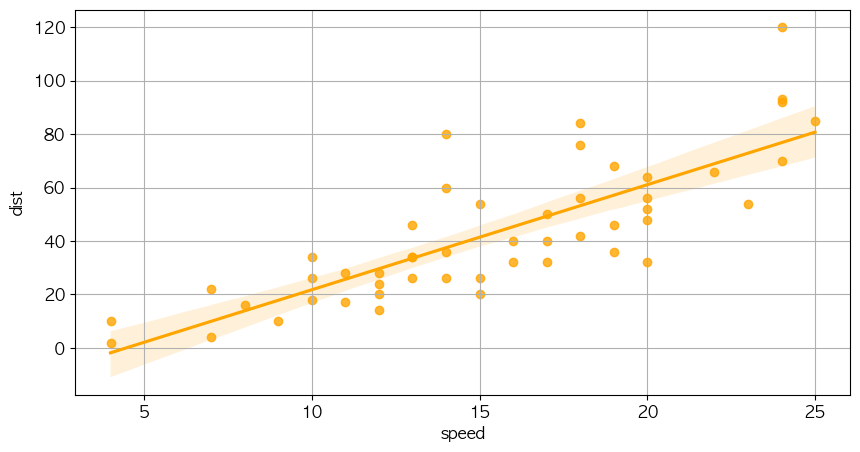

In [5]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='orange')
plt.grid()

plt.show()
plt.close()

> 곡선보다는 선형 분포에 더 가까우므로 단순선형회귀모델을 적용하기로 함

### 5) 데이터셋 분할
- 랜덤시드 고정

In [6]:
np.random.seed(777)

- 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [7]:
x = origin.drop(['dist'], axis = 1)
y = origin[['dist']]
print('훈련데이터 크기:', x.shape, '/ 레이블 크기:', y.shape)

훈련데이터 크기: (50, 1) / 레이블 크기: (50, 1)


- (추가) 데이터 정규화(표준화) 수행
    - 독립변수와 종속변수를 분할한 상태에서 표준화 실행해야 된다

In [8]:
# 독립변수 표준화
x_scaler = MinMaxScaler()
x_scale = x_scaler.fit_transform(x)
x_scale

# 종속변수 표준화
y_scaler = MinMaxScaler()
y_scale = y_scaler.fit_transform(y)
y_scale

array([[0.        ],
       [0.06779661],
       [0.01694915],
       [0.16949153],
       [0.11864407],
       [0.06779661],
       [0.13559322],
       [0.20338983],
       [0.27118644],
       [0.12711864],
       [0.22033898],
       [0.10169492],
       [0.15254237],
       [0.18644068],
       [0.22033898],
       [0.20338983],
       [0.27118644],
       [0.27118644],
       [0.37288136],
       [0.20338983],
       [0.28813559],
       [0.49152542],
       [0.66101695],
       [0.15254237],
       [0.20338983],
       [0.44067797],
       [0.25423729],
       [0.3220339 ],
       [0.25423729],
       [0.3220339 ],
       [0.40677966],
       [0.33898305],
       [0.45762712],
       [0.62711864],
       [0.69491525],
       [0.28813559],
       [0.37288136],
       [0.55932203],
       [0.25423729],
       [0.38983051],
       [0.42372881],
       [0.45762712],
       [0.52542373],
       [0.54237288],
       [0.44067797],
       [0.57627119],
       [0.76271186],
       [0.771

- 훈련 데이터와 검증 데이터로 분할

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, 
                                                    y_scale, 
                                                    test_size = 0.3, 
                                                    random_state=777)
print('훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d' % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 35, 검증용 데이터셋 크기: 15


### 6) 모델 개발
- 모델 정의

In [10]:
my_model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번때 Dense 층
my_model.add(Dense(32, activation = 'relu', input_shape = (1,)))
    # input_shape = 1 -> 하나의 값을 입력 (독립변수 개수)
my_model.add(Dense(1, activation = 'linear'))
    # 하나의 값을 출력
    # 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear (linear는 기본값이므로 생략 가능)
    
my_model.compile(optimizer='adam', 
                 loss='mse',
                 metrics=['mae'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
os.getcwd()

'/Users/dayoonz/Desktop/data_analysist/F_데이터마이닝/3_Tensorflow'

In [12]:
# result = my_model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test))
# 파일이 저장될 경로(폴더) 지정 (한글, 공백, 점(.)이 포함되어 잇을 경우 에러 발생함)

checkpoint_path = os.path.join('D:\\tensorflow_checkpoint\\model07-cp-{epoch:04d}-ckpt')

result = my_model.fit(x_train, 
                      y_train, 
                      epochs=500, 
                      validation_data=(x_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss',
                                               patience=10,
                                               verbose=1),
                                ReduceLROnPlateau(monitor='val_loss',
                                                  patience=3,
                                                  factor = 0.5,
                                                  min_lr=0.0001,
                                                  verbose=1),
                                ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)])
# 학습 결과
result_df = DataFrame(result.history)
result_df['epochs']=result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500


1/2 [==============>...............] - ETA: 0s - loss: 0.0179 - mae: 0.0983
Epoch 1: val_loss improved from inf to 0.01713, saving model to D:\tensorflow_checkpoint\model07-cp-0001-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0001-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0001-ckpt/assets


2/2 [==============================] - 1s 613ms/step - loss: 0.0173 - mae: 0.0972 - val_loss: 0.0171 - val_mae: 0.0953 - lr: 0.0010
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0128 - mae: 0.0885
Epoch 2: val_loss did not improve from 0.01713
2/2 [==============================] - 0s 25ms/step - loss: 0.0169 - mae: 0.0962 - val_loss: 0.0171 - val_mae: 0.0954 - lr: 0.0010
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0166 - mae: 0.0946
Epoch 3: val_loss improved from 0.01713 to 0.01712, saving model to D:\tensorflow_checkpoint\model07-cp-0003-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0003-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0003-ckpt/assets


2/2 [==============================] - 0s 248ms/step - loss: 0.0169 - mae: 0.0963 - val_loss: 0.0171 - val_mae: 0.0964 - lr: 0.0010
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0155 - mae: 0.0922
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 4: val_loss did not improve from 0.01712
2/2 [==============================] - 0s 22ms/step - loss: 0.0166 - mae: 0.0963 - val_loss: 0.0171 - val_mae: 0.0973 - lr: 0.0010
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0155 - mae: 0.0922
Epoch 5: val_loss did not improve from 0.01712
2/2 [==============================] - 0s 20ms/step - loss: 0.0165 - mae: 0.0965 - val_loss: 0.0172 - val_mae: 0.0978 - lr: 5.0000e-04
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0154 - mae: 0.0925
Epoch 6: val_loss did not improve from 0.01712
2/2 [==============================] - 0s 21ms/step - loss: 0.0165 - mae: 0.0965 - val_loss: 0.0172 - val_mae: 0.0980 - 

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,0.017282,0.097153,0.017135,0.095310,0.001000
2,0.016942,0.096164,0.017139,0.095408,0.001000
3,0.016880,0.096287,0.017123,0.096365,0.001000
4,0.016632,0.096317,0.017138,0.097312,0.001000
5,0.016546,0.096486,0.017151,0.097832,0.000500
6,0.016473,0.096451,0.017159,0.098026,0.000500
7,0.016454,0.096453,0.017172,0.098461,0.000500
8,0.016422,0.096468,0.017175,0.098481,0.000250
9,0.016414,0.096435,0.017180,0.098533,0.000250


### 7) 학습 결과 평가
- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

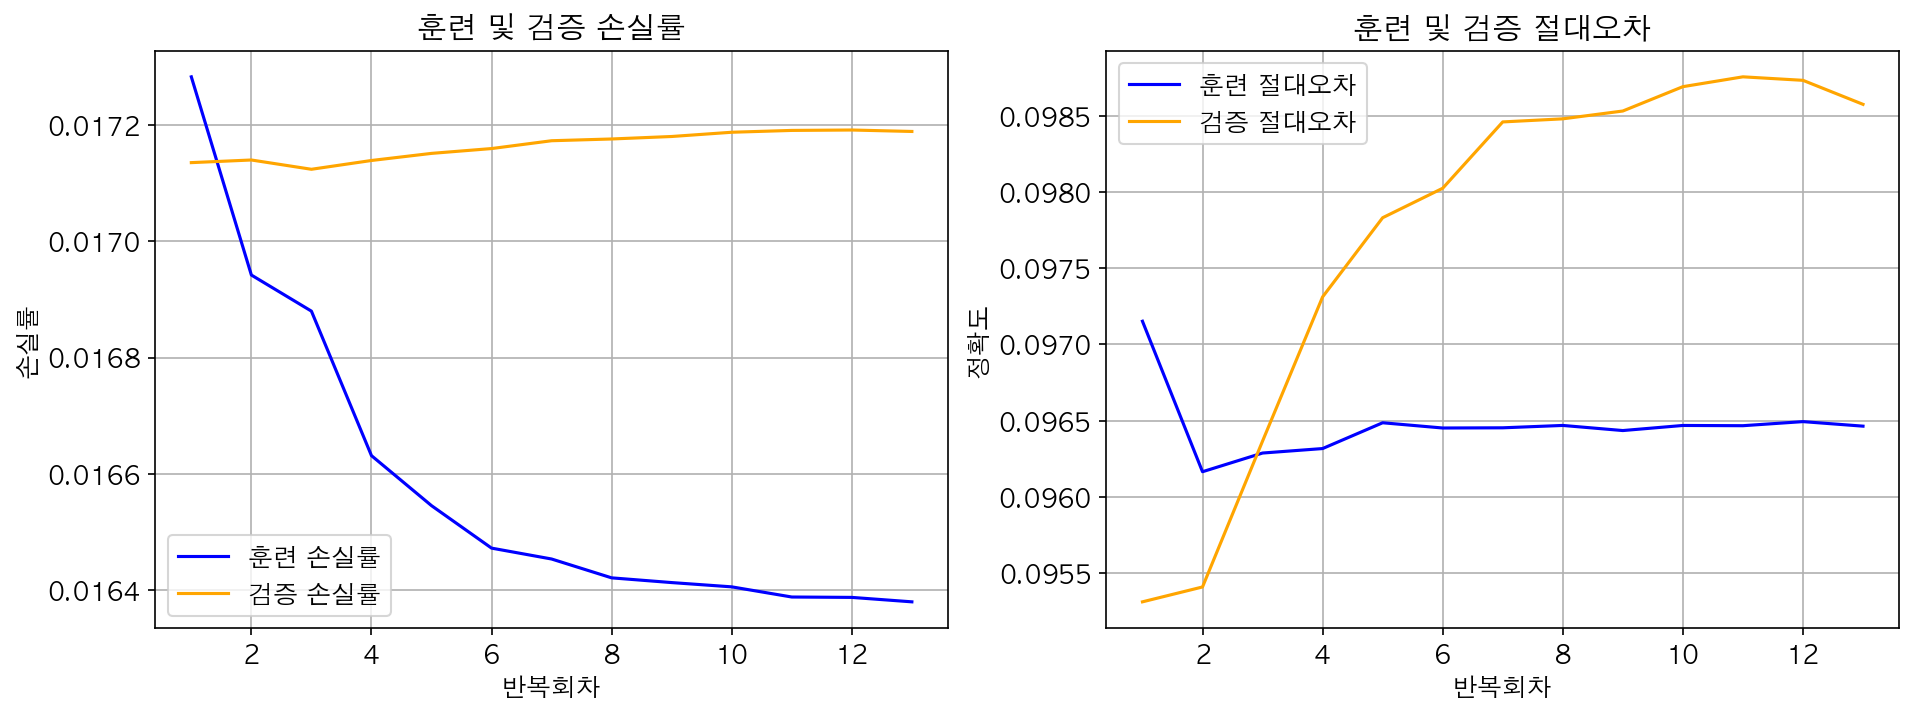

In [13]:
# 그래프 기본설정
plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus']=False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
sb.lineplot(x=result_df.index, 
            y='loss',
            data=result_df, 
            color='blue',
            label='훈련 손실률',
            ax=ax1)
sb.lineplot(x=result_df.index, 
            y='val_loss',
            data=result_df, 
            color='orange',
            label='검증 손실률',
            ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
sb.lineplot(x=result_df.index,
            y='mae',
            data=result_df,
            color='blue',
            label='훈련 절대오차',
            ax=ax2)
sb.lineplot(x=result_df.index,
            y='val_mae',
            data=result_df,
            color='orange',
            label='검증 절대오차',
            ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

> epochs를 500으로 지정했지만 `일찍 학습을 멈춘 것을 확인`할 수 있다
>
> 즉, 학습을 `조기 종료`함으로서 `학습 성능을 향상`시켰다고 할 수 있다

- 모델 성능 평가

In [14]:
evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 절대오차: %f' % (evaluate1[0], evaluate1[1]))

evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 절대오차: %f' % (evaluate1[0], evaluate2[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.0164 - mae: 0.0964


최종 훈련 손실률: 0.016386, 최종 훈련 절대오차: 0.096421
1/1 [==============================] - 0s 18ms/step - loss: 0.0172 - mae: 0.0986
최종 검증 손실률: 0.016386, 최종 검증 절대오차: 0.098577


### 8) 학습 결과 적용
- 테스트 데이터에 대한 예측 결과 산정

In [15]:
results = my_model.predict(x_test)
print(results)

1/1 [==============================] - 0s 54ms/step
[[0.573081  ]
 [0.2737073 ]
 [0.24376996]
 [0.2138326 ]
 [0.45333153]
 [0.30364466]
 [0.30364466]
 [0.42339414]
 [0.24376996]
 [0.45333153]
 [0.30364466]
 [0.48326883]
 [0.09408312]
 [0.2737073 ]
 [0.00377667]]


- 결과 데이터셋 구성

In [16]:
kdf = DataFrame({'검증데이터': x_test.flatten(),
                 '실제값': y_test.flatten(),
                 '예측값': results.flatten()})

kdf['예측오차'] = kdf['실제값'] - kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
0,0.904762,0.440678,0.573081,-0.132403
1,0.428571,0.271186,0.273707,-0.002521
2,0.380952,0.101695,0.243770,-0.142075
3,0.333333,0.127119,0.213833,-0.086714
4,0.714286,0.372881,0.453332,-0.080450
5,0.476190,0.491525,0.303645,0.187881
6,0.476190,0.661017,0.303645,0.357372
7,0.666667,0.338983,0.423394,-0.084411
8,0.380952,0.152542,0.243770,-0.091228
9,0.714286,0.559322,0.453332,0.105991


- 실제 결과값과 머신러닝에 의한 예측값 비교

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

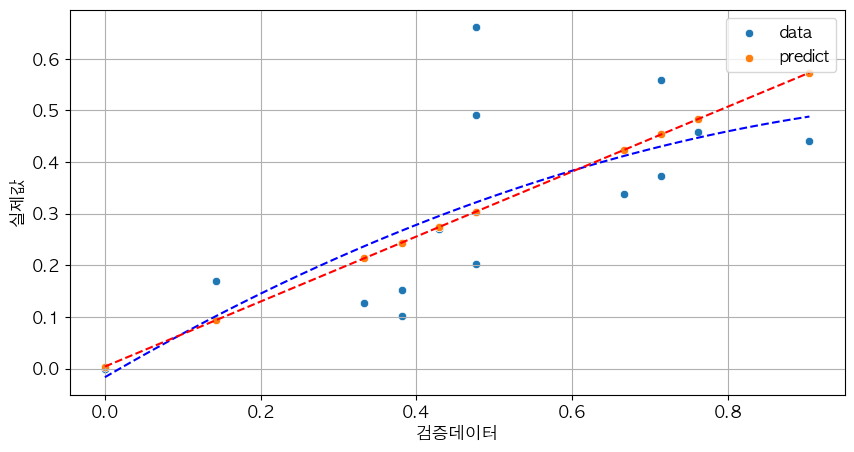

In [17]:
helper.regplot(x_left=kdf['검증데이터'],
               y_left=kdf['실제값'],
               y_left_pred=kdf['예측값'])

> 머신러닝의 예측값은 다소 실제 데이터보다 좀 높게 예측하는 경향이 있다
> 
> 반면 통계분석의 예측값은 다소 실제 데이터보다 좀 낮게 예측하는 경향이 있다 (더 보수적이기도 하다)

- 임의의 값에 대한 머신러닝 예측 결과

In [18]:
# 속도가 50일 때의 제동거리를 예측해보자
my_speed = 50

# 독립변수 표준화에 사용한 객체를 활용
my_speed_scale = x_scaler.transform([[my_speed]])
my_speed_scale

# 예측 결과 # 표준화된 상태
results = my_model.predict(my_speed_scale)
results

# 예측 결과는 표준화된 값으로 나오기 때문에 원래의 단위로 되돌리기 위해 역변환
y_scaler.inverse_transform(results)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


array([[165.00401]], dtype=float32)